# Convection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typhon import plots

import konrad


plots.styles.use()

In its default configuration, konrad simulates a radiative-convective
equilibrium state. However, it is possible to turn off the convective
adjustment.

## Radiative equilibrium (RE)

In a first step, we equilibrate our model to a pure radiative equilibrium.
In this configuration no other tendencies besides the radiative cooling are present - in particulr no convection.

In [2]:
phlev = konrad.utils.get_quadratic_pgrid(1000e2, 10, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)
atmosphere["CO2"][:] = 348e-6 # Set reference CO2 concentration

re = konrad.RCE(
    atmosphere,
    convection=konrad.convection.NonConvective(),
    timestep='24h',
    max_duration='150d',
)
re.run()

## Radiative-convective equilibrium (RCE)

In a second step, we enable the convective adjustment. We copy the existing atmosphere component to create to individual components that we can later compare.

In [3]:
rce = konrad.RCE(
    atmosphere.copy(),  # Create an separate atmosphere component.
    convection=konrad.convection.HardAdjustment(),
    timestep='24h',
    max_duration='150d',
)
rce.run()

## Compare RE and RCE

Finally, we can compare the thermal structure in radiative equilibrium (RE) and radiative-convective equilibrium (RCE).
Without convection the temperature lapse-rate in the troposphere is increase significantly.
This leads to a much cooler tropopsphere despite the same surface temperature (see markers at the bottom).

In the stratosphere, however, both model configurations are in a pure radiative equilbrium, which is why they barely differ.

(99999.99999999991, 6.679409185473571)

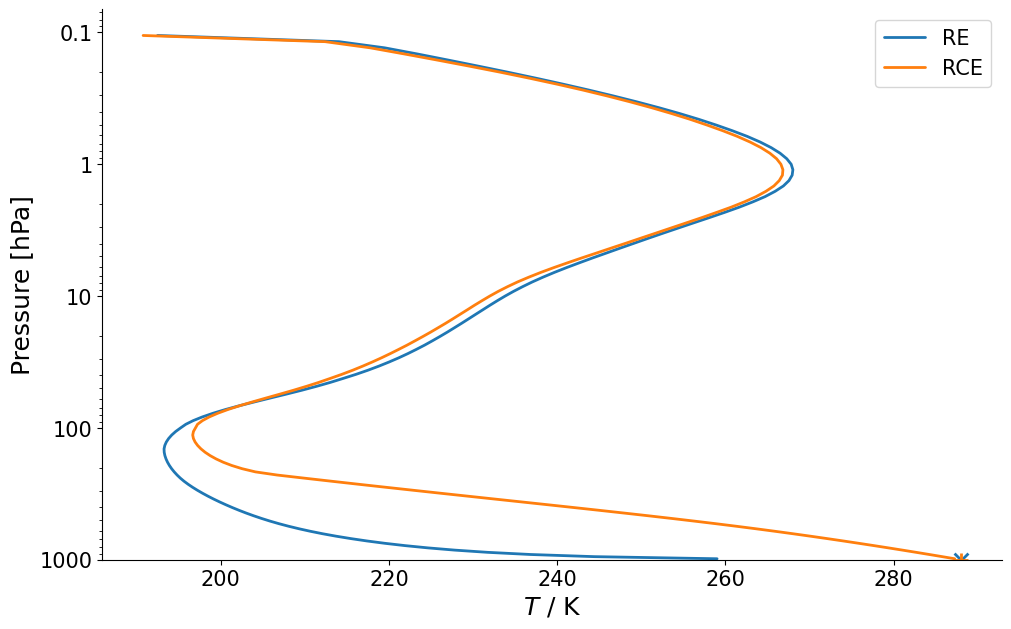

In [4]:
fig, ax = plt.subplots()
# Plot radiative equilibrium (RE)
l, = plots.profile_p_log(re.atmosphere["plev"], re.atmosphere["T"][-1], label="RE")
ax.scatter(re.surface["temperature"][-1], re.surface.pressure, marker="x", color=l.get_color())
# Plot radiative-convective equilibrium (RCE)
l, = plots.profile_p_log(rce.atmosphere["plev"], rce.atmosphere["T"][-1], label="RCE")
ax.scatter(rce.surface["temperature"][-1], rce.surface.pressure, marker="+", color=l.get_color())

ax.legend()
ax.set_xlabel(r"$T$ / K")
ax.set_ylim(bottom=re.surface.pressure)